In [ ]:
import os
import shutil
from matplotlib import pyplot
from matplotlib.image import imread
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout
from keras.src.legacy.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

#### Load dataset and create directories

In [ ]:
dataset_dir = 'C:/Users/dbastola2022/OneDrive - Florida Atlantic University/Academics/Summer 2025/Deep Learning/Modules/Homework/HW3/CNN/data'
base_dir = 'dogvscat'
os.makedirs(base_dir, exist_ok=True)

# Directory structure
for subset in ['train', 'validation', 'test']:
    for category in ['dog', 'cat']:
        dir_path = os.path.join(base_dir, subset, category)
        os.makedirs(dir_path, exist_ok=True)

# Function to copy images
def copy_images(category, start_idx, end_idx, subset):
    fnames = [f"{category}.{i}.jpg" for i in range(start_idx, end_idx)]
    for fname in fnames:
        src = os.path.join(dataset_dir, fname)
        dst = os.path.join(base_dir, subset, category, fname)
        shutil.copyfile(src, dst)

# Copy 1000 cats and 1000 dogs to train
copy_images('cat', 0, 1000, 'train')
copy_images('dog', 0, 1000, 'train')

# Copy 500 cats and 500 dogs to validation
copy_images('cat', 1000, 1500, 'validation')
copy_images('dog', 1000, 1500, 'validation')

# Copy 500 cats and 500 dogs to test
copy_images('cat', 1500, 2000, 'test')
copy_images('dog', 1500, 2000, 'test')

<>:1: SyntaxWarning: invalid escape sequence '\O'
<>:1: SyntaxWarning: invalid escape sequence '\O'
C:\Users\dbastola2022\AppData\Local\Temp\ipykernel_8140\1816232528.py:1: SyntaxWarning: invalid escape sequence '\O'
  dataset_dir = 'C:/Users/dbastola2022\OneDrive - Florida Atlantic University/Academics/Summer 2025/Deep Learning/Modules/Homework/HW3/CNN/data'


#### Display sample

In [18]:

def displayImages(foldername,dogorcat,startID):
    # plot first few images
    for i in range(9):
        #define subplot 3x3
        pyplot.subplot(330 + 1 + i)
        # define filename
        filename = foldername + dogorcat +'.' + str(i+startID) + '.jpg'
        # load image pixels
        image = imread(filename)
        # plot raw pixel data
        pyplot.imshow(image)
        # show the figure
pyplot.show()

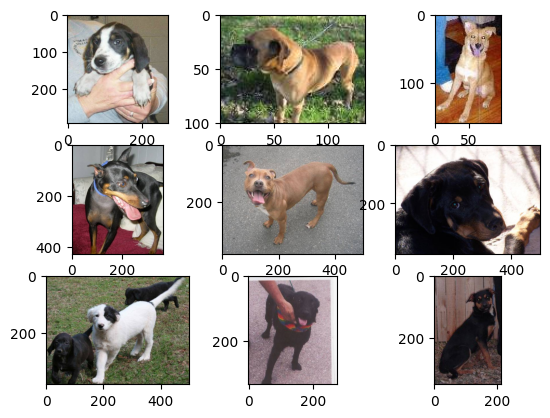

In [19]:
displayImages(base_dir+"/train/dog/","dog",10)

### CNN classifier with at least three convolution layers, two pooling layers, and two dense layers.

#### Data generator

In [20]:
# Image preprocessing
train_data_gen = ImageDataGenerator(rescale=1./255)
val_data_gen = ImageDataGenerator(rescale=1./255)
test_data_gen = ImageDataGenerator(rescale=1./255)

# Define paths for directories
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Create data generators
train_generator = train_data_gen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

val_generator = val_data_gen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

test_generator = test_data_gen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


#### Define basic model

In [21]:
# Define CNN model
model_base = Sequential()
model_base.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model_base.add(MaxPooling2D((2, 2)))

model_base.add(Conv2D(64, (3, 3), activation='relu'))
model_base.add(MaxPooling2D((2, 2)))

model_base.add(Conv2D(128, (3, 3), activation='relu'))

model_base.add(Flatten())
model_base.add(Dense(128, activation='relu'))
model_base.add(Dense(1, activation='sigmoid'))  # Binary output: cat or dog

# Compile the model
model_base.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

# Summary of the model
model_base.summary()

c:\Users\dbastola2022\OneDrive - Florida Atlantic University\Academics\Summer 2025\Deep Learning\Modules\Homework\HW3\CNN\CNN_DogVsCat\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 147968)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    18,940,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,033,409 (72.61 MB)

 Trainable params: 19,033,409 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Train the model
model_base.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
    )

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 63s 618ms/step - accuracy: 0.5047 - loss: 0.8702 - val_accuracy: 0.5550 - val_loss: 0.6858
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 388ms/step - accuracy: 0.5920 - loss: 0.6544 - val_accuracy: 0.5970 - val_loss: 0.6622
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 43s 429ms/step - accuracy: 0.6882 - loss: 0.5847 - val_accuracy: 0.6740 - val_loss: 0.5980
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 40s 394ms/step - accuracy: 0.7483 - loss: 0.5054 - val_accuracy: 0.6630 - val_loss: 0.7445
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 393ms/step - accuracy: 0.8199 - loss: 0.3979 - val_accuracy: 0.6520 - val_loss: 0.7557
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 40s 398ms/step - accuracy: 0.9122 - loss: 0.2194 - val_accuracy: 0.6890 - val_loss: 0.9367
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 386ms/step - accuracy: 0.9525 - loss: 0.1323 - val_accuracy: 0.6760 - val_loss: 1.2339
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 37s 372ms/step - accuracy: 0.9820 - loss: 0

In [23]:
# Evaluate the model on test set
test_loss, test_acc = model_base.evaluate(test_generator)
print("Test Accuracy: {:.2f}%".format(test_acc * 100))

50/50 ━━━━━━━━━━━━━━━━━━━━ 13s 251ms/step - accuracy: 0.6670 - loss: 1.5784
Test Accuracy: 66.30%


#### Define a model with dropout layers and batch normalization

In [24]:
# Model with dropout layers and Batch Normalization
model_second = Sequential()
model_second.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model_second.add(BatchNormalization()) # Adding batch normalization
model_second.add(MaxPooling2D((2, 2)))

model_second.add(Conv2D(64, (3, 3), activation='relu'))
model_second.add(BatchNormalization())
model_second.add(MaxPooling2D((2, 2)))
model_second.add(Dropout(0.3)) # Adding dropout layer

model_second.add(Conv2D(128, (3, 3), activation='relu'))
model_second.add(BatchNormalization())

model_second.add(Flatten())
model_second.add(Dense(128, activation='relu'))
model_second.add(BatchNormalization())  # Adding batch normalization
model_second.add(Dropout(0.5))  # Adding final dropout layer

model_second.add(Dense(1, activation='sigmoid'))  # Binary output: cat or dog

# Compile the model
model_second.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

# Summary of the model
model_second.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 148, 148, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 72, 72, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 34, 34, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 147968)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │    18,940,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,817 (72.61 MB)

 Trainable params: 19,034,113 (72.61 MB)

 Non-trainable params: 704 (2.75 KB)

In [25]:
history = model_second.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 68s 650ms/step - accuracy: 0.5564 - loss: 1.1397 - val_accuracy: 0.5000 - val_loss: 0.9541
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 64s 639ms/step - accuracy: 0.6575 - loss: 0.6623 - val_accuracy: 0.5990 - val_loss: 0.6641
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 67s 668ms/step - accuracy: 0.7219 - loss: 0.5569 - val_accuracy: 0.5100 - val_loss: 1.0708
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 67s 667ms/step - accuracy: 0.7938 - loss: 0.4607 - val_accuracy: 0.5180 - val_loss: 1.0162
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 67s 673ms/step - accuracy: 0.8211 - loss: 0.3939 - val_accuracy: 0.6400 - val_loss: 0.7237
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 66s 660ms/step - accuracy: 0.8883 - loss: 0.2844 - val_accuracy: 0.6890 - val_loss: 0.6448
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 66s 657ms/step - accuracy: 0.9343 - loss: 0.1771 - val_accuracy: 0.7190 - val_loss: 0.6451
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 64s 639ms/step - accuracy: 0.9385 - loss: 0

In [26]:
test_loss, test_acc = model_second.evaluate(test_generator)
print("Test Accuracy with Dropout and Batch Normalization: {:.2f}%".format(test_acc * 100))

50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - accuracy: 0.6899 - loss: 0.8555
Test Accuracy with Dropout and Batch Normalization: 70.00%


### For the above network (including a mixed use of dropout layer and Batch Normalization), using image_data_generator with rotation, width_shift, height_shift, shear, and zoom to create image distortions for training. 

#### Data generator


In [30]:
# Augmented training data generator
train_data_gen_aug = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2
)

# Validation and test generators (no augmentation)
val_data_gen_aug = ImageDataGenerator(rescale=1./255)
test_data_gen_aug = ImageDataGenerator(rescale=1./255)

# Create augmented data generator
train_generator_aug = train_data_gen_aug.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

val_generator_aug = val_data_gen_aug.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

test_generator_aug = test_data_gen_aug.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


#### Model second fit (CNN with BatchNormalization and Dropout) with augmented data



In [31]:
# Train model using augmented data
history_aug = model_second.fit(
    train_generator_aug,
    epochs=10,
    validation_data=val_generator_aug
)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 68s 674ms/step - accuracy: 0.7669 - loss: 0.4875 - val_accuracy: 0.6380 - val_loss: 0.7885
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 69s 692ms/step - accuracy: 0.7694 - loss: 0.4898 - val_accuracy: 0.7040 - val_loss: 0.6059
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 66s 659ms/step - accuracy: 0.7557 - loss: 0.4915 - val_accuracy: 0.6830 - val_loss: 0.6677
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 66s 662ms/step - accuracy: 0.7851 - loss: 0.4668 - val_accuracy: 0.5300 - val_loss: 0.9704
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 66s 657ms/step - accuracy: 0.7739 - loss: 0.4634 - val_accuracy: 0.7400 - val_loss: 0.5208
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 69s 689ms/step - accuracy: 0.7974 - loss: 0.4646 - val_accuracy: 0.6910 - val_loss: 0.7133
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 64s 634ms/step - accuracy: 0.7876 - loss: 0.4614 - val_accuracy: 0.7050 - val_loss: 0.5880
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 64s 636ms/step - accuracy: 0.7714 - loss: 0

In [32]:

# Evaluate the model on test set with augmented data
test_loss_aug, test_acc_aug = model_second.evaluate(test_generator_aug)
print("Test Accuracy with Augmented Data: {:.2f}%".format(test_acc_aug * 100))

50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.7179 - loss: 0.5489
Test Accuracy with Augmented Data: 73.20%


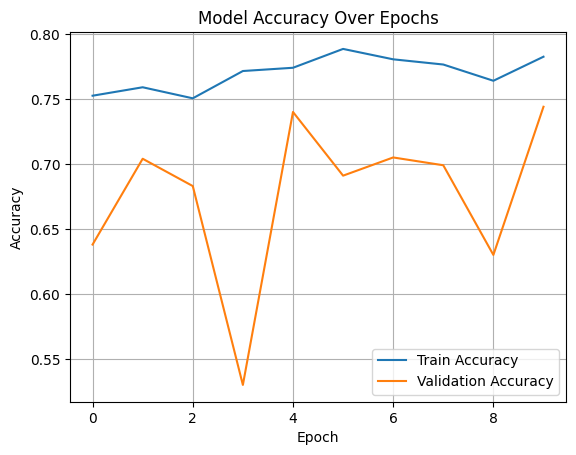

In [ ]:
# Plot accuracy
plt.plot(history_aug.history['accuracy'], label='Train Accuracy')
plt.plot(history_aug.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()